In [1]:
import os
from pathlib import Path
from PIL import Image
import cv2
import numpy as np
import json
from shapely.geometry import Polygon
import image_slicer
import time

# DeepLab code:
# taken from https://gluon-cv.mxnet.io/build/examples_segmentation/demo_deeplab.html
# dataset description https://groups.csail.mit.edu/vision/datasets/ADE20K/, https://github.com/dmlc/gluon-cv/blob/master/gluoncv/data/ade20k/segmentation.py
# deeplab code https://github.com/dmlc/gluon-cv/blob/master/gluoncv/model_zoo/deeplabv3.py

import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
from gluoncv.data.transforms.presets.segmentation import test_transform
# using cpu
ctx = mx.cpu(0)

# OCR code
import pytesseract
from pytesseract import Output


# If you don't have tesseract executable in your PATH, include the following:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe' # Path('C:/Program Files\ Tesseract-OCR\ tesseract').as_posix()


# Scene recognition imports
from Keras_VGG16_places365.vgg16_places_365 import VGG16_Places365
from cv2 import resize


import evaluation_utils as eval_u
import deeplab_utils as dl_u

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
### (Code for testing, now useless)
"""
#image_list_deeplab, list_image_names_deeplab, list_ratio = eval_u.prepare_dataset('../small_10_test2017/', 'deeplab', True)
image_list_deeplab, list_image_names_deeplab, list_ratio, list_shapes = eval_u.prepare_dataset('../1_test2017/', 'deeplab', True)
model_deeplab = eval_u.load_model('deeplab')
output_pred_deeplab = eval_u.get_predictions(image_list_deeplab, 'deeplab', model_deeplab)
print(output_pred_deeplab[0][0].shape)
print(output_pred_deeplab[0][1].shape)
#outp = mx.nd.squeeze(mx.nd.argmax(output_pred_deeplab[0], 1)).asnumpy()
print(output_pred_deeplab[0][1].shape)
print(type(output_pred_deeplab[0][1]))
#print(np.unique(output_pred_deeplab[0][1]))
# Resizing image test

#from skimage.transform import resize
#testresize = resize(output_pred_deeplab[0][1].asnumpy(), (list_shapes[0][0], list_shapes[0][1]))
#print(testresize.shape)
#print(testresize)

# Test output with probabilities
output = dl_u.deeplab_pred_to_output(output_pred_deeplab[0][1], False, True, output_pred_deeplab[0][0], True, list_shapes[0])

output = dl_u.deeplab_pred_to_output(output_pred_deeplab[0][1])
"""

"\n#image_list_deeplab, list_image_names_deeplab, list_ratio = eval_u.prepare_dataset('../small_10_test2017/', 'deeplab', True)\nimage_list_deeplab, list_image_names_deeplab, list_ratio, list_shapes = eval_u.prepare_dataset('../1_test2017/', 'deeplab', True)\nmodel_deeplab = eval_u.load_model('deeplab')\noutput_pred_deeplab = eval_u.get_predictions(image_list_deeplab, 'deeplab', model_deeplab)\nprint(output_pred_deeplab[0][0].shape)\nprint(output_pred_deeplab[0][1].shape)\n#outp = mx.nd.squeeze(mx.nd.argmax(output_pred_deeplab[0], 1)).asnumpy()\nprint(output_pred_deeplab[0][1].shape)\nprint(type(output_pred_deeplab[0][1]))\n#print(np.unique(output_pred_deeplab[0][1]))\n# Resizing image test\n\n#from skimage.transform import resize\n#testresize = resize(output_pred_deeplab[0][1].asnumpy(), (list_shapes[0][0], list_shapes[0][1]))\n#print(testresize.shape)\n#print(testresize)\n\n# Test output with probabilities\noutput = dl_u.deeplab_pred_to_output(output_pred_deeplab[0][1], False, True, 

In [3]:
## OCR

path_image_folder = '../10_test2017/'
pathlist = Path(path_image_folder).glob('**/*.*')


list_img = []
list_img_name = []
list_output_OCR = []
for path in pathlist:
    start = time.time()
    print("---------------- Image ", path, "------------------")
    # Read data
    img, img_name, _, _ = eval_u.prepare_sample(path, 'OCR', True)
    output_pred_OCR = eval_u.get_predictions([img], 'OCR')
    list_img.append(img)
    list_img_name.append(img_name)
    list_output_OCR.append(output_pred_OCR)
    end = time.time()
    print("Time to process image: ", end - start)

---------------- Image  ..\10_test2017\2017_10000580.jpg ------------------
Time to process image:  0.6812028884887695
---------------- Image  ..\10_test2017\2017_10051027.jpg ------------------
Time to process image:  0.18696951866149902
---------------- Image  ..\10_test2017\2017_10376474.jpg ------------------
Time to process image:  1.9939064979553223
---------------- Image  ..\10_test2017\2017_11174421.jpg ------------------
Time to process image:  0.6340460777282715
---------------- Image  ..\10_test2017\2017_11534654.jpg ------------------
Time to process image:  1.1064367294311523
---------------- Image  ..\10_test2017\2017_12465739.jpg ------------------
Time to process image:  1.2902212142944336
---------------- Image  ..\10_test2017\2017_12866523.jpg ------------------
Time to process image:  0.2837514877319336
---------------- Image  ..\10_test2017\2017_13756260.png ------------------
Time to process image:  0.937053918838501
---------------- Image  ..\10_test2017\2017_1434

In [4]:
print(list_output_OCR)

[[[]], [[]], [[('&', (465, 416, 205, 191)), ('|', (696, 428, 33, 140)), ('Ga', (824, 418, 325, 255)), ('ndideor', (1179, 462, 552, 146)), ('fe', (374, 669, 128, 190)), ('SENOR', (544, 726, 160, 97)), ('WALTRAPAS', (740, 744, 280, 80)), ('S.L.', (1054, 750, 111, 72)), ('“', (471, 816, 31, 39)), ('MANUEL', (536, 824, 173, 49)), ('|', (764, 834, 8, 38)), ('ASALA', (797, 824, 152, 45)), ('22', (988, 826, 59, 37)), ('-', (1089, 848, 2, 2)), ('ZARAGOZA', (1148, 831, 251, 37)), ('Nan', (439, 804, 209, 134)), ('BYNIGLDH2', (692, 883, 288, 52)), ('"Vendedor\':', (369, 955, 325, 136)), ('PMPLEADO', (743, 1008, 263, 57)), ('1', (1049, 1006, 17, 41)), ('Ticket:', (398, 1083, 292, 61)), ('01/040653', (737, 1072, 299, 61)), ('Mesa:', (1144, 1069, 157, 42)), ('MESA', (1349, 1068, 133, 42)), ('4', (1519, 1070, 31, 39)), ('Fecha', (376, 1161, 172, 52)), (':', (667, 1175, 14, 32)), ('14/03/2015', (735, 1140, 333, 66)), ('Hora:', (1143, 1136, 160, 45)), ('15:49', (1359, 1133, 162, 44)), ('Precio', (1249,

In [23]:
def printOCR(list_words, image_path):
    print(list_words)
    img = cv2.imread(image_path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for word in list_words:
        img = cv2.rectangle(img, (word[1][0], word[1][1]), (word[1][0] + word[1][2], word[1][1] + word[1][3]), (0, 255, 0), 2)
    #img = cv2.resize(img, (960, 540))  # Resize image
    

    plt.imshow(img)

#    cv2.imshow('img', img)
#    cv2.waitKey(0)
#    cv2.destroyAllWindows()

[('a', (314, 533, 86, 16)), ('CHINESE', (145, 698, 465, 61)), ('VISA', (696, 693, 205, 46)), ('iE', (191, 819, 93, 41)), ('L', (517, 796, 35, 50)), ('x', (949, 798, 31, 29)), ('x', (1109, 795, 32, 28)), ('‘CATEGORY', (194, 862, 185, 27)), ('ENTRIES', (947, 842, 194, 24))]


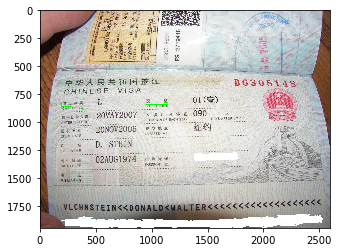

In [26]:
image_id = 4
id_im = 0
pathlist = Path(path_image_folder).glob('**/*.*')

for path in pathlist:
    if id_im == image_id:
        break
    id_im += 1
#print(type(path))
printOCR(list_output_OCR[image_id][0], str(path))
#printOCR(list_output_OCR[image_id][0], '2017_12571467.jpg')

In [30]:
## Semantic segmentation

# Restructure to obtain data image per image instead of loading everything.
path_image_folder = '../10_test2017/'
pathlist = Path(path_image_folder).glob('**/*.*')


list_img = []
list_img_name = []
list_img_ratio = []
list_img_shapes = []
list_output = []
for path in pathlist:
    start = time.time()
    print("---------------- Image ", path, "------------------")
    # Read data
    #image_list_deeplab, list_image_names_deeplab, list_ratio, list_shapes = eval_u.prepare_dataset('../1_test2017/', 'deeplab', True)
    img, img_name, img_ratio, img_shapes = eval_u.prepare_sample(path, 'deeplab', True)
    # Get predictions
    model_deeplab = eval_u.load_model('deeplab')
    output_pred_deeplab = eval_u.get_predictions([img], 'deeplab', model_deeplab)
    # Post process to polygon
    #output = dl_u.deeplab_pred_to_output(output_pred_deeplab[0][1], False, True, output_pred_deeplab[0][0])
    output = dl_u.deeplab_pred_to_output(output_pred_deeplab[0][1], False, True, output_pred_deeplab[0][0], True, img_shapes)
    list_img.append(img)
    list_img_name.append(img_name)
    list_img_ratio.append(img_ratio)
    list_img_shapes.append(img_shapes)
    list_output.append(output)
    end = time.time()
    print("Time to process image: ", end - start)

---------------- Image  ..\10_test2017\2017_10000580.jpg ------------------
predicting
calculating labels
calculating probabilities.
Creating masks.
Resizing image prediction.
Number of classes with masks to create:  10
Number of classes with masks to create:  10
Time to process image:  60.55090260505676
---------------- Image  ..\10_test2017\2017_10051027.jpg ------------------
predicting
calculating labels
calculating probabilities.
Creating masks.
Resizing image prediction.
Number of classes with masks to create:  3
Number of classes with masks to create:  3
Time to process image:  18.835853815078735
---------------- Image  ..\10_test2017\2017_10376474.jpg ------------------
predicting
calculating labels
calculating probabilities.
Creating masks.
Resizing image prediction.
Number of classes with masks to create:  10
Number of classes with masks to create:  10
Time to process image:  57.755279779434204
---------------- Image  ..\10_test2017\2017_11174421.jpg ------------------
predic

In [10]:
"""
# Getting confidence for polygon.
print(output[0])
x, y = output[0][0][0].exterior.coords.xy
print(list(output[0][0][0].exterior.coords.xy))
print((np.frombuffer(x).astype(int)), np.frombuffer(y).astype(int))
x = np.frombuffer(x).astype(int)
y = np.frombuffer(y).astype(int)

from scipy.ndimage.morphology import binary_fill_holes as imfill

mask = np.zeros((image_list_deeplab[0].shape[2], image_list_deeplab[0].shape[3]),dtype=bool)
mask[x, y] = 1
img_proba = output_pred_deeplab[0][0][0, output[0][2], :, :]
out = img_proba[imfill(mask)].sum() / img_proba[imfill(mask)].shape[0]

mask.shape
print(np.unique(mask))
print(imfill(mask))
print(img_proba[imfill(mask)])
print(out)
"""

'\n# Getting confidence for polygon.\nprint(output[0])\nx, y = output[0][0][0].exterior.coords.xy\nprint(list(output[0][0][0].exterior.coords.xy))\nprint((np.frombuffer(x).astype(int)), np.frombuffer(y).astype(int))\nx = np.frombuffer(x).astype(int)\ny = np.frombuffer(y).astype(int)\n\nfrom scipy.ndimage.morphology import binary_fill_holes as imfill\n\nmask = np.zeros((image_list_deeplab[0].shape[2], image_list_deeplab[0].shape[3]),dtype=bool)\nmask[x, y] = 1\nimg_proba = output_pred_deeplab[0][0][0, output[0][2], :, :]\nout = img_proba[imfill(mask)].sum() / img_proba[imfill(mask)].shape[0]\n\nmask.shape\nprint(np.unique(mask))\nprint(imfill(mask))\nprint(img_proba[imfill(mask)])\nprint(out)\n'

In [11]:
print(output)

[([(<shapely.geometry.polygon.Polygon object at 0x000001B450DA8F88>, 0.05650999148686727), (<shapely.geometry.polygon.Polygon object at 0x000001B450D8D788>, 0.15555193424224853), (<shapely.geometry.polygon.Polygon object at 0x000001B4513C5FC8>, 0.13319347644674367), (<shapely.geometry.polygon.Polygon object at 0x000001B4513C5F88>, 0.11957741946708865), (<shapely.geometry.polygon.Polygon object at 0x000001B4513C5C88>, 0.06050040821234385), (<shapely.geometry.polygon.Polygon object at 0x000001B4513C59C8>, 0.1418322675368365), (<shapely.geometry.polygon.Polygon object at 0x000001B4513C58C8>, 0.09715843828100908)], 'wall', 0), ([(<shapely.geometry.polygon.Polygon object at 0x000001B439F9F048>, 0.0024550985544919968)], 'person, individual, someone, somebody, mortal, soul', 12), ([(<shapely.geometry.polygon.Polygon object at 0x000001B4513C5EC8>, 7.849202180902164e-05), (<shapely.geometry.polygon.Polygon object at 0x000001B4513C5908>, 0.00019977344200015069), (<shapely.geometry.polygon.Polygo

In [12]:
print(output[0][0][0])

(<shapely.geometry.polygon.Polygon object at 0x000001B450DA8F88>, 0.05650999148686727)


In [31]:
def print_plot_semantic_segmentation(image_path, output, class_object=[]):
    print("----------- Image ", image_path, "----------------")
    
    list_poly = []
    img = image.imread(image_path)
    fig, ax = plt.subplots()
    ax.imshow(img.asnumpy())
    for poly_type in output:
        if len(class_object) > 0:
            if poly_type[1] in class_object:
                list_poly.append(poly_type[0])
                for poly in poly_type[0]:
                    x,y = poly[0].exterior.xy
                    ax.plot(x,y ,  linewidth=5)
        else:
            for poly in poly_type[0]:
                x,y = poly[0].exterior.xy
                ax.plot(x,y ,  linewidth=5)
                
    if len(class_object) > 0:
        print(list_poly)
    else:
        print(output)
    plt.show()

----------- Image  ..\10_test2017\2017_11534654.jpg ----------------
[([(<shapely.geometry.polygon.Polygon object at 0x0000021218ECA748>, 0.05436678727467855), (<shapely.geometry.polygon.Polygon object at 0x0000021218ECAD08>, 0.0354486270384355)], 'wall', 0), ([(<shapely.geometry.polygon.Polygon object at 0x0000021218ECA548>, 0.00810470369954904), (<shapely.geometry.polygon.Polygon object at 0x0000021218ECAC48>, 0.007550227371129123)], 'floor, flooring', 3), ([(<shapely.geometry.polygon.Polygon object at 0x000002123E9D2F88>, 0.11984042326609294), (<shapely.geometry.polygon.Polygon object at 0x0000021218ECDC08>, 0.10246070948514072)], 'bed', 7), ([(<shapely.geometry.polygon.Polygon object at 0x0000021218ECAD48>, 0.10795406500498454), (<shapely.geometry.polygon.Polygon object at 0x0000021218ECA788>, 0.051498702078154594)], 'person, individual, someone, somebody, mortal, soul', 12), ([(<shapely.geometry.polygon.Polygon object at 0x0000021218ED79C8>, 0.010149714847405752), (<shapely.geomet

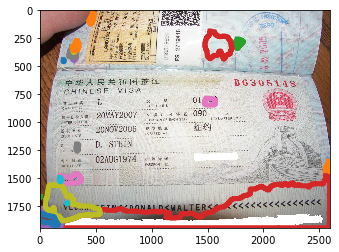

----------- Image  ..\10_test2017\2017_11534654.jpg ----------------
[[(<shapely.geometry.polygon.Polygon object at 0x0000021218ECAD48>, 0.10795406500498454), (<shapely.geometry.polygon.Polygon object at 0x0000021218ECA788>, 0.051498702078154594)]]


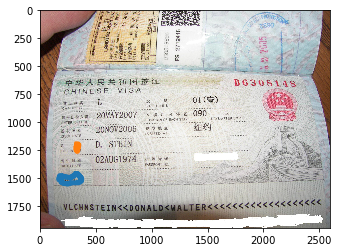

In [32]:
image_id = 4
id_im = 0
pathlist = Path(path_image_folder).glob('**/*.*')

for path in pathlist:
    if id_im == image_id:
        break
    id_im += 1
#print(path)
print_plot_semantic_segmentation(path, list_output[image_id])
print_plot_semantic_segmentation(path, list_output[image_id], ["person, individual, someone, somebody, mortal, soul", 'painting, picture'])

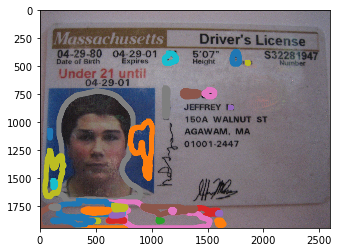

In [13]:
# Test plotting the image and polygons

import matplotlib.pyplot as plt

img = image.imread(path)

#plt.imshow(img.asnumpy())

"""
for poly in output[1][0]:
    #x,y = output[0][0][0][0].exterior.xy
    x,y = poly[0].exterior.xy
    #print(x)
    plt.plot(x,y)

#plt.show()
"""


#x,y = output[1][0][0][0].exterior.xy
fig, ax = plt.subplots()
ax.imshow(img.asnumpy()) #, extent=[0, 3000, 0, 3000])
#ax.autoscale(False)
for poly_type in output:
    for poly in poly_type[0]:
        x,y = poly[0].exterior.xy
        ax.plot(x,y ,  linewidth=5)
plt.show()


In [3]:
def simple_rule_based_obfuscation(output_deeplab):
    # Later we can save other things like the "sky" to decide to hide it
    true_output = []
    for poly in output_deeplab:
        if (poly[1] == "person, individual, someone, somebody, mortal, soul") or (poly[1] == "bookcase") or (poly[1] == "computer, computing machine, computing device, data processor, ") or (poly[1] == "trade name, brand name, brand, marque") :
            true_output.append(poly)
    return true_output

In [4]:
#print(type(output_pred_deeplab[0]))

In [ ]:
def ruleBasedMapping(list_semantic_segmentation, list_OCR, list_scene):
    list_private_deeplab_labels = ["person, individual, someone, somebody, mortal, soul", \
                                   "car, auto, automobile, machine, motorcar", \
                   "bus, autobus, coach, charabanc, double-decker, jitney, motorbus, ", \
                   "motorcoach, omnibus, passenger vehicle", "truck, motortruck", "van", 
                   "conveyer belt, conveyor belt, conveyer, conveyor, transporter",  "minibike, motorbike", \
                   "bicycle, bike, wheel, cycle", "poster, posting, placard, notice, bill, card", \
                   "signboard sign", "bulletin board, notice board", \
                  "screen door, screen",  "screen, silver screen, projection screen", \
                  "crt screen", "plate", "monitor, monitoring device", \
                   "bookcase", "blind, screen", "book", "computer, computing machine, computing device, data processor ", \
                    "electronic computer, information processing system", \
                    "television receiver, television, television set, tv, tv set, idiot ", \
                    "trade name, brand name, brand, marque", "flag"]
    polys_to_obfuscate = []
    for poly in list_semantic_segmentation:
        if poly[1] in list_private_deeplab_labels:
            if # Check that the size of the polygons is large enough to actually see anything on the images.
            polys_to_obfuscate.append(poly)

In [5]:
list_true_output = []
for output in list_output:
    list_true_output.append(simple_rule_based_obfuscation(output))
#true_output = simple_rule_based_obfuscation(list_output)
print(list_true_output)

[[([(<shapely.geometry.polygon.Polygon object at 0x000002207FF96588>, 0.0024550985544919968)], 'person, individual, someone, somebody, mortal, soul', 12)]]


In [7]:
### In the real outputs, we would simply have list of polygons that are private (i.e. that the approach told us to obfuscate)
### Hence we should reshape the outputs to this format in this case.

def predictions_to_private_segments(list_true_output):
    list_private_segments = []
    for pred_image in list_true_output:
        poly_for_image = []
        for private_elem in pred_image:
            for poly_in_private in private_elem[0]:
                poly_for_image.append(poly_in_private[0])
        list_private_segments.append(poly_for_image)
    return list_private_segments

In [8]:
list_true_output_reshape = predictions_to_private_segments(list_true_output)
print(list_true_output_reshape)

[[<shapely.geometry.polygon.Polygon object at 0x000002207FF96588>]]


In [9]:
with open(Path('../test2017.json'), 'r') as f:
    ground_truth = json.load(f)
ground_truth = ground_truth['annotations']

In [10]:
evaluation_type = 'privacy_type'
parameter_interval = [0.1, 0.5, 0.8, 1.0]
eval_u.evaluate(ground_truth, list_true_output_reshape, evaluation_type, parameter_interval, list_img_name, list_img_shapes)#, path_image_folder)

TODO: read predictions.
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
nb non valid polygons: in GT:  0
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates
TODO: check order coordinates


({'a109_person_body': {0.1: 1.0, 0.5: 1.0, 0.8: 1.0, 1.0: 0.0},
  'a24_birth_date': {0.1: 0.0, 0.5: 0.0, 0.8: 0.0, 1.0: 0.0},
  'a106_address_current_all': {0.1: 0.0, 0.5: 0.0, 0.8: 0.0, 1.0: 0.0},
  'a32_drivers_license': {0.1: 1.0, 0.5: 0.0, 0.8: 0.0, 1.0: 0.0},
  'a8_signature': {0.1: 0.0, 0.5: 0.0, 0.8: 0.0, 1.0: 0.0},
  'a111_name_all': {0.1: 0.0, 0.5: 0.0, 0.8: 0.0, 1.0: 0.0},
  'a107_address_home_all': {0.1: 0.0, 0.5: 0.0, 0.8: 0.0, 1.0: 0.0},
  'a105_face_all': {0.1: 1.0, 0.5: 0.0, 0.8: 0.0, 1.0: 0.0}},
 {'a109_person_body': 0.9491980827559842,
  'a24_birth_date': 0.0,
  'a106_address_current_all': 0.0,
  'a32_drivers_license': 0.18487154577379414,
  'a8_signature': 0.0,
  'a111_name_all': 0.0,
  'a107_address_home_all': 0.0,
  'a105_face_all': 1.0})

In [11]:
evaluation_type = 'instance_type'
parameter_interval = [4, 10, 16, 20]
eval_u.evaluate(ground_truth, list_true_output_reshape, evaluation_type, parameter_interval, list_img_name, list_img_shapes)#, path_image_folder)

Check whether these rules are making sense.
For now, for each segment, we say that if more than half of the pixels are set to 1, then the segment is set at 1.
Check whether these rules are making sense.
For now, for each segment, we say that if more than half of the pixels are set to 1, then the segment is set at 1.
Check whether these rules are making sense.
For now, for each segment, we say that if more than half of the pixels are set to 1, then the segment is set at 1.
Check whether these rules are making sense.
For now, for each segment, we say that if more than half of the pixels are set to 1, then the segment is set at 1.
TODO: how to deal with NaN values?
Check whether these rules are making sense.
For now, for each segment, we say that if more than half of the pixels are set to 1, then the segment is set at 1.
Check whether these rules are making sense.
For now, for each segment, we say that if more than half of the pixels are set to 1, then the segment is set at 1.
Check wheth

{4: {'precision': nan, 'recall': 0.0},
 10: {'precision': 1.0, 'recall': 0.1111111111111111},
 16: {'precision': 1.0, 'recall': 0.08333333333333333},
 20: {'precision': 1.0, 'recall': 0.16666666666666666}}

In [12]:
"""
def prepare_groundtruth_data(GT_file, list_image_names, list_ratio):
    with open(Path(GT_file), 'r') as f:
        ground_truth = json.load(f)
    ground_truth = ground_truth['annotations']    
    list_GT = []
    for im, im_ratio in zip(list_image_names, list_ratio):
        gt_dict = eval_u.GT_annotation_to_polygon_dict(ground_truth[im], im_ratio)                
        list_GT.append(gt_dict)
    #    for segments in ground_truth[im]["attributes"]:
    #        # Get the ground truth
    #        class_label = segments['attr_id']
        
    #        # Get polygons
        
    #        # Reshape polygons
    return list_GT
"""

'\ndef prepare_groundtruth_data(GT_file, list_image_names, list_ratio):\n    with open(Path(GT_file), \'r\') as f:\n        ground_truth = json.load(f)\n    ground_truth = ground_truth[\'annotations\']    \n    list_GT = []\n    for im, im_ratio in zip(list_image_names, list_ratio):\n        gt_dict = eval_u.GT_annotation_to_polygon_dict(ground_truth[im], im_ratio)                \n        list_GT.append(gt_dict)\n    #    for segments in ground_truth[im]["attributes"]:\n    #        # Get the ground truth\n    #        class_label = segments[\'attr_id\']\n        \n    #        # Get polygons\n        \n    #        # Reshape polygons\n    return list_GT\n'

In [24]:
#out = prepare_groundtruth_data('../test2017.json', list_image_names_deeplab, list_ratio)

In [25]:
#out